This notebook trains the neural networks associated with the neural Granger causality, and displays already saved results

In [ ]:
import os
import warnings
warnings.filterwarnings("ignore")
import data_preprocessing.data_preprocessing as data
import torch
import numpy as np
import matplotlib.pyplot as plt
from data_preprocessing.neural_granger_causality_functions import cLSTM, train_model_ista, train_val_ith_fold_unregularised

SMALL_SIZE = 15
MEDIUM_SIZE = 21
BIGGER_SIZE = 21

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['font.family'] = 'Arial'

Results of previous training, for three choices of $\lambda$

In [16]:
params4 = np.load("./data_preprocessing/causal_data/4_causal_connections_params.npy")
params3 = np.load("./data_preprocessing/causal_data/3_causal_connections_params.npy")
params2 = np.load("./data_preprocessing/causal_data/2_causal_connections_params.npy")
loss4 = np.load("./data_preprocessing/causal_data/4_causal_connections_loss.npy")
loss3 = np.load("./data_preprocessing/causal_data/3_causal_connections_loss.npy")
loss2 = np.load("./data_preprocessing/causal_data/2_causal_connections_loss.npy")

<>:58: SyntaxWarning: invalid escape sequence '\l'
<>:59: SyntaxWarning: invalid escape sequence '\l'
<>:60: SyntaxWarning: invalid escape sequence '\l'
<>:61: SyntaxWarning: invalid escape sequence '\l'
<>:62: SyntaxWarning: invalid escape sequence '\l'
<>:63: SyntaxWarning: invalid escape sequence '\l'
<>:58: SyntaxWarning: invalid escape sequence '\l'
<>:59: SyntaxWarning: invalid escape sequence '\l'
<>:60: SyntaxWarning: invalid escape sequence '\l'
<>:61: SyntaxWarning: invalid escape sequence '\l'
<>:62: SyntaxWarning: invalid escape sequence '\l'
<>:63: SyntaxWarning: invalid escape sequence '\l'
C:\Users\User\AppData\Local\Temp\ipykernel_6040\1201583329.py:58: SyntaxWarning: invalid escape sequence '\l'
  ax[0,0].set_title("$\lambda = 1.6 \\times 10^{-4}$")
C:\Users\User\AppData\Local\Temp\ipykernel_6040\1201583329.py:59: SyntaxWarning: invalid escape sequence '\l'
  ax[0,1].set_title("$\lambda = 3 \\times 10^{-3}$")
C:\Users\User\AppData\Local\Temp\ipykernel_6040\1201583329.p

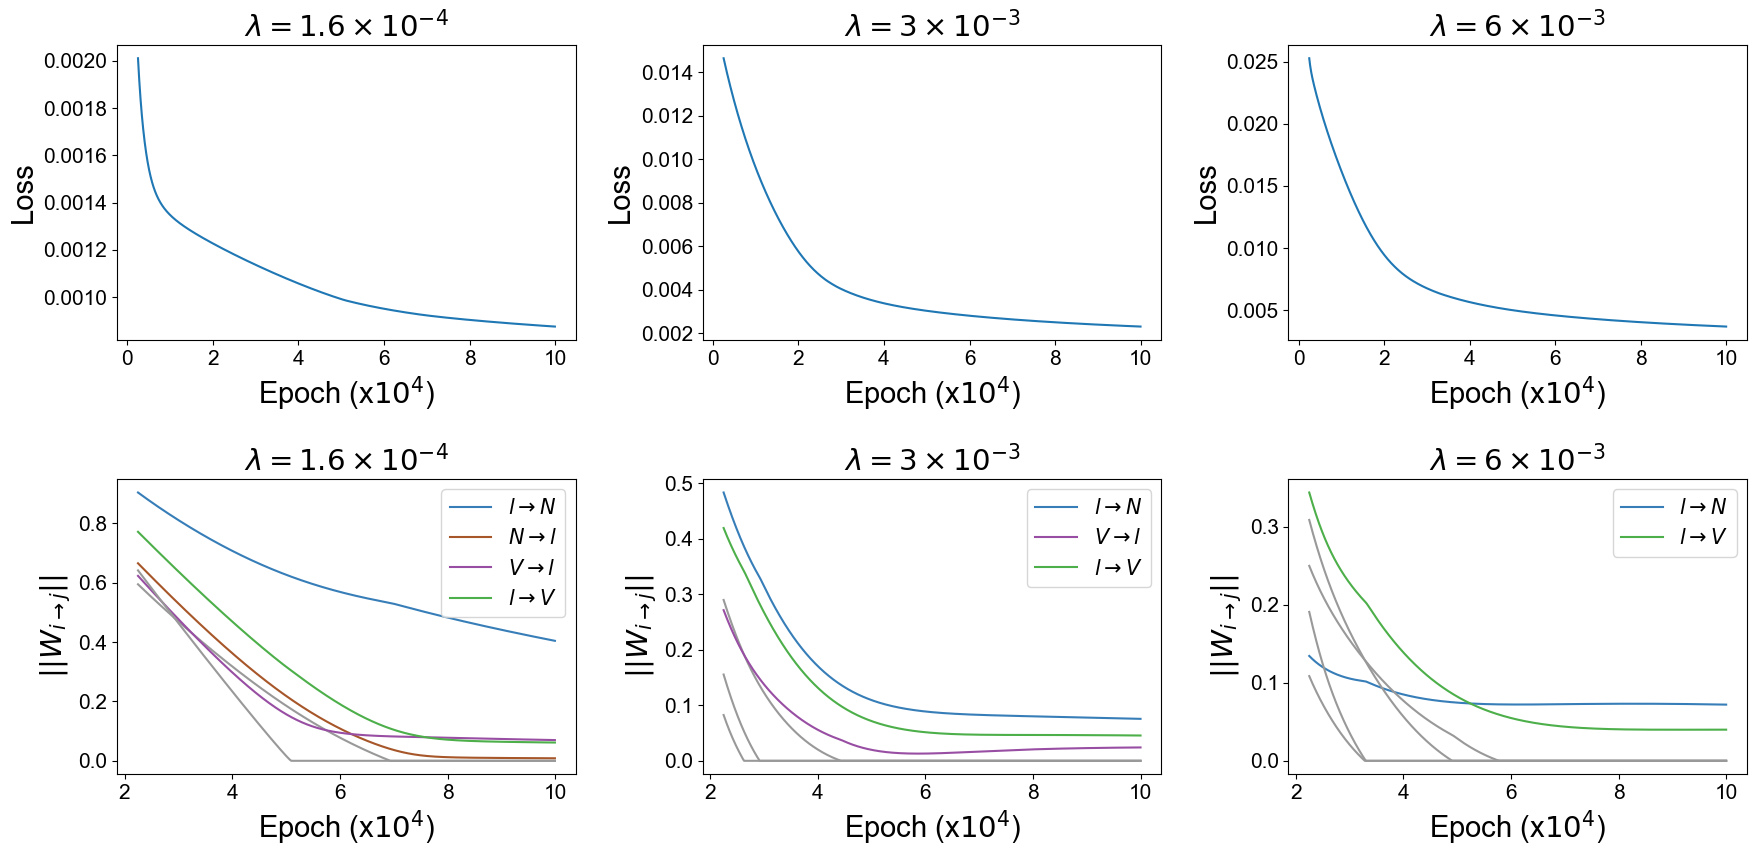

In [17]:
fig, ax = plt.subplots(2,3, figsize = (18,9))
params4_t = np.transpose(np.array(params4), axes = (1,2,0))
params3_t = np.transpose(np.array(params3), axes = (1,2,0))
params2_t = np.transpose(np.array(params2), axes = (1,2,0))

s=50
ax[0,0].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000, loss4[50:])
ax[0,1].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000,loss3[50:])
ax[0,2].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000,loss2[50:])

causalities = np.array([[r"$N \rightarrow N$", r"$l \rightarrow N$", r"$V \rightarrow N$"],
               [r"$N \rightarrow l$", r"$l \rightarrow l$", r"$V \rightarrow l$"],
               [r"$N \rightarrow V$", r"$l \rightarrow V$", r"$V \rightarrow V$"]])

indexes = np.array([[0,1,4],
           [6,0,3],
           [5,2,0]])

s = 450
for i in range(3):
    for j in range(3):
        if i != j:
            if params4_t[i][j][-1] != 0:
                ax[1,0].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000, params4_t[i][j][s:], label = causalities[i,j], color=plt.cm.Set1(indexes[i,j]))

            else:
                ax[1,0].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000, params4_t[i][j][s:], color=plt.cm.Set1(8))

            if params3_t[i][j][-1] != 0:
                ax[1,1].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000, params3_t[i][j][s:], label = causalities[i,j], color=plt.cm.Set1(indexes[i,j]))

            else:
                ax[1,1].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000, params3_t[i][j][s:], color=plt.cm.Set1(8))

            if params2_t[i][j][-1] != 0:
                ax[1,2].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000, params2_t[i][j][s:], label = causalities[i,j], color=plt.cm.Set1(indexes[i,j]))
            else:
                ax[1,2].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000, params2_t[i][j][s:], color=plt.cm.Set1(8))

ax[1,0].legend()
ax[1,1].legend()
ax[1,2].legend()

ax[0,0].set_xlabel("Epoch (x$10^4$)")
ax[0,1].set_xlabel("Epoch (x$10^4$)")
ax[0,2].set_xlabel("Epoch (x$10^4$)")
ax[1,0].set_xlabel("Epoch (x$10^4$)")
ax[1,1].set_xlabel("Epoch (x$10^4$)")
ax[1,2].set_xlabel("Epoch (x$10^4$)")

ax[0,0].set_ylabel("Loss")
ax[0,1].set_ylabel("Loss")
ax[0,2].set_ylabel("Loss")
ax[1,0].set_ylabel(r"$||W_{i \rightarrow j}||$")
ax[1,1].set_ylabel(r"$||W_{i \rightarrow j}||$")
ax[1,2].set_ylabel(r"$||W_{i \rightarrow j}||$")

ax[0,0].set_title("$\lambda = 1.6 \\times 10^{-4}$")
ax[0,1].set_title("$\lambda = 3 \\times 10^{-3}$")
ax[0,2].set_title("$\lambda = 6 \\times 10^{-3}$")
ax[1,0].set_title("$\lambda = 1.6 \\times 10^{-4}$")
ax[1,1].set_title("$\lambda = 3 \\times 10^{-3}$")
ax[1,2].set_title("$\lambda = 6 \\times 10^{-3}$")

plt.tight_layout()




Loading causal graphs for 9 pairs of context length and hidden layer size

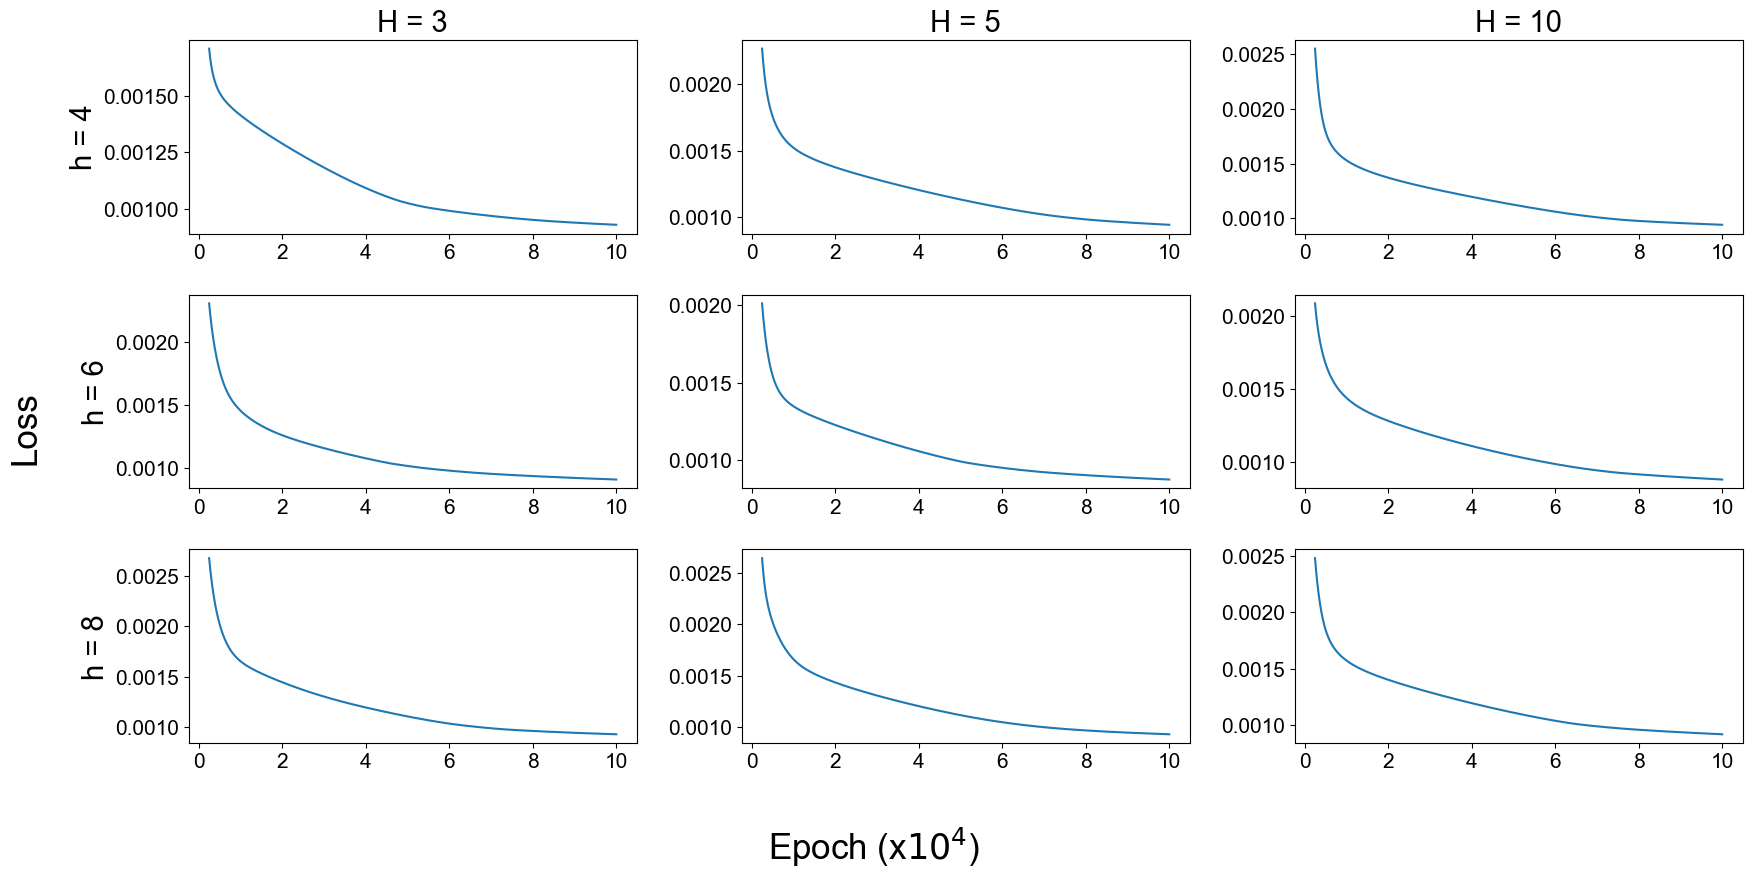

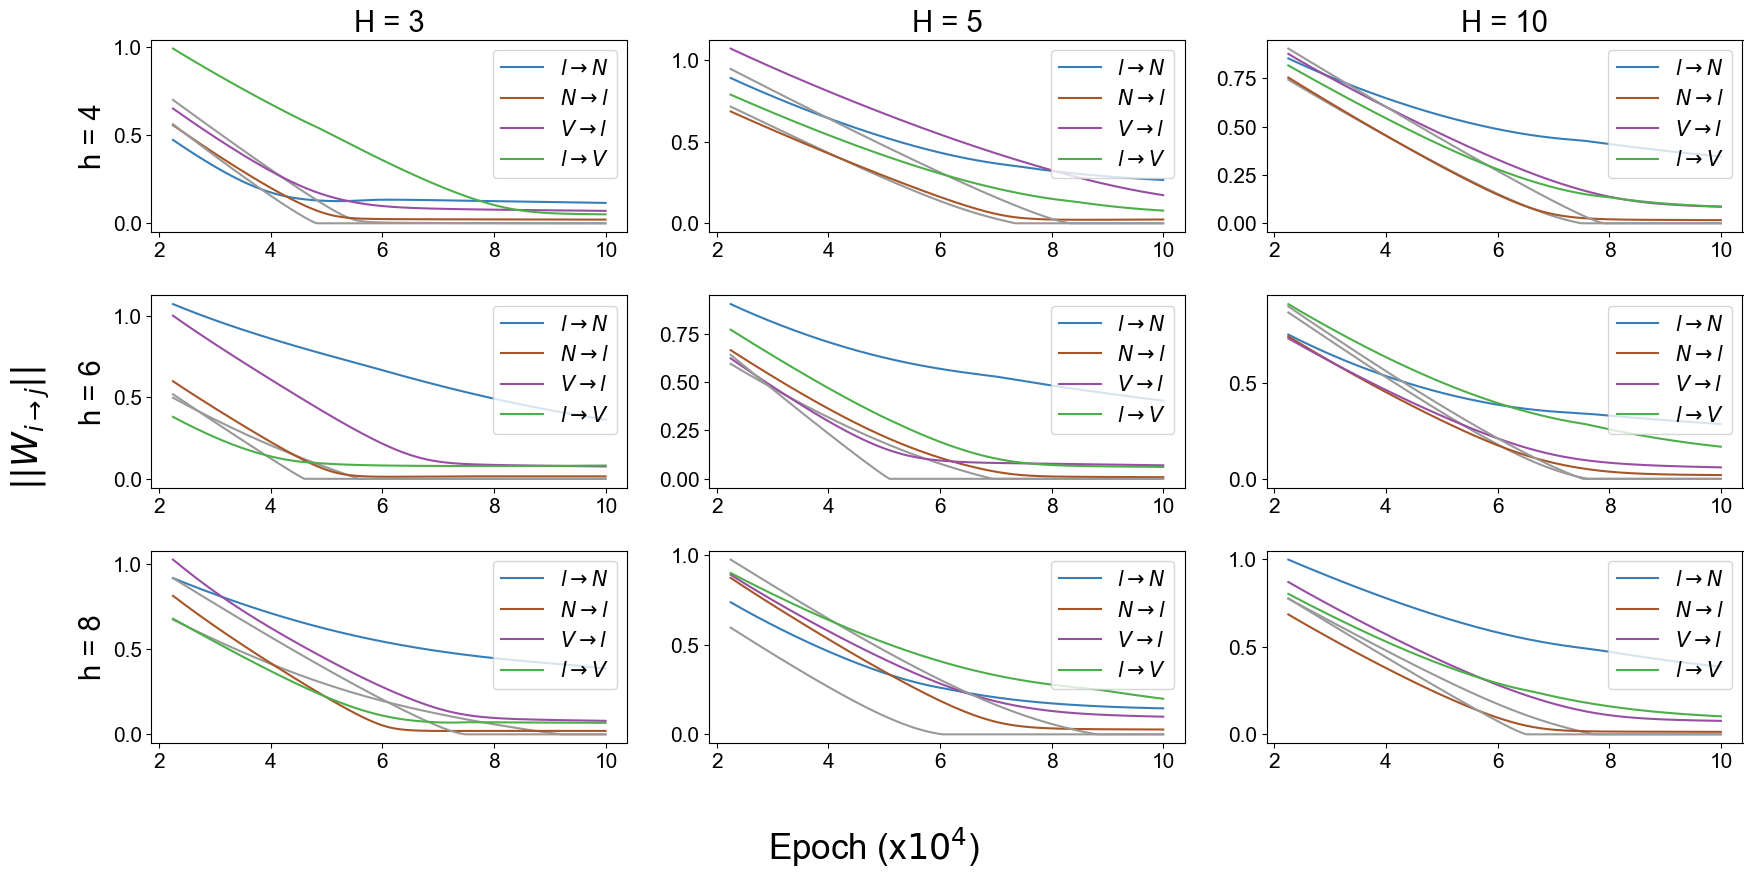

In [18]:
#lam is the regularisation parameter used to train the model. lr is the learning rate
params_h4_H3 = np.load("./data_preprocessing/causal_data/context_and_hidden/context4_hidden3_params.npy")#lam=1.8e-4,lr=1.4e-1
loss_h4_H3 = np.load("./data_preprocessing/causal_data/context_and_hidden/context4_hidden3_loss.npy")#lam=1.8e-4,lr=1.4e-1
params_h4_H5 = np.load("./data_preprocessing/causal_data/context_and_hidden/context4_hidden5_params.npy")#lam=1.8e-4,lr=1e-1
loss_h4_H5 = np.load("./data_preprocessing/causal_data/context_and_hidden/context4_hidden5_loss.npy")#lam=1.8e-4,lr=1e-1
params_h4_H10 = np.load("./data_preprocessing/causal_data/context_and_hidden/context4_hidden10_params.npy")#lam=1.8e-4,lr=1e-1
loss_h4_H10 = np.load("./data_preprocessing/causal_data/context_and_hidden/context4_hidden10_loss.npy")#lam=1.8e-4,lr=1e-1

params_h8_H3 = np.load("./data_preprocessing/causal_data/context_and_hidden/context8_hidden3_params.npy")#lam=2e-4, lr=1e-1
loss_h8_H3 = np.load("./data_preprocessing/causal_data/context_and_hidden/context8_hidden3_loss.npy")#lam=2e-4, lr=1e-1
params_h8_H5 = np.load("./data_preprocessing/causal_data/context_and_hidden/context8_hidden5_params.npy")#lam=2e-4, lr=1e-1
loss_h8_H5 = np.load("./data_preprocessing/causal_data/context_and_hidden/context8_hidden5_loss.npy")#lam=2e-4, lr=1e-1
params_h8_H10 = np.load("./data_preprocessing/causal_data/context_and_hidden/context8_hidden10_params.npy")#lam=2e-4, lr=1e-1
loss_h8_H10 = np.load("./data_preprocessing/causal_data/context_and_hidden/context8_hidden10_loss.npy")#lam=2e-4, lr=1e-1

params_h6_H3 = np.load("./data_preprocessing/causal_data/context_and_hidden/context6_hidden3_params.npy")#lam=1.6e-4,lr=1.4e-1
loss_h6_H3 = np.load("./data_preprocessing/causal_data/context_and_hidden/context6_hidden3_loss.npy")#lam=1.6e-4,lr=1.4e-1
params_h6_H5 = np.load("./data_preprocessing/causal_data/4_causal_connections_params.npy")#lam=1.6e-4,lr=1.4e-1
loss_h6_H5 = np.load("./data_preprocessing/causal_data/4_causal_connections_loss.npy")#lam=1.6e-4,lr=1.4e-1
params_h6_H10 = np.load("./data_preprocessing/causal_data/context_and_hidden/context6_hidden10_params.npy")#lam=1.6e-4,lr=1.4e-1
loss_h6_H10 = np.load("./data_preprocessing/causal_data/context_and_hidden/context6_hidden10_loss.npy")#lam=1.6e-4,lr=1.4e-1

fig, ax = plt.subplots(3,3, figsize = (18,9))

s=50
ax[0,0].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000, loss_h4_H3[s:])
ax[0,1].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000,loss_h4_H5[s:])
ax[0,2].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000,loss_h4_H10[s:])
ax[1,0].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000, loss_h6_H3[s:])
ax[1,1].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000,loss_h6_H5[s:])
ax[1,2].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000,loss_h6_H10[s:])
ax[2,0].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000, loss_h8_H3[s:])
ax[2,1].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000,loss_h8_H5[s:])
ax[2,2].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000,loss_h8_H10[s:])

fig.supxlabel("Epoch (x$10^4$)")
fig.supylabel("Loss")

ax[0,0].set_ylabel("h = 4")
ax[1,0].set_ylabel("h = 6")
ax[2,0].set_ylabel("h = 8")

ax[0,0].set_title("H = 3")
ax[0,1].set_title("H = 5")
ax[0,2].set_title("H = 10")

plt.tight_layout()

fig, ax = plt.subplots(3,3, figsize = (18,9))
params_h4_H3_t = np.transpose(np.array(params_h4_H3), axes = (1,2,0))
params_h4_H5_t = np.transpose(np.array(params_h4_H5), axes = (1,2,0))
params_h4_H10_t = np.transpose(np.array(params_h4_H10), axes = (1,2,0))
params_h6_H3_t = np.transpose(np.array(params_h6_H3), axes = (1,2,0))
params_h6_H5_t = np.transpose(np.array(params_h6_H5), axes = (1,2,0))
params_h6_H10_t = np.transpose(np.array(params_h6_H10), axes = (1,2,0))
params_h8_H3_t = np.transpose(np.array(params_h8_H3), axes = (1,2,0))
params_h8_H5_t = np.transpose(np.array(params_h8_H5), axes = (1,2,0))
params_h8_H10_t = np.transpose(np.array(params_h8_H10), axes = (1,2,0))

causalities = np.array([[r"$N \rightarrow N$", r"$l \rightarrow N$", r"$V \rightarrow N$"],
               [r"$N \rightarrow l$", r"$l \rightarrow l$", r"$V \rightarrow l$"],
               [r"$N \rightarrow V$", r"$l \rightarrow V$", r"$V \rightarrow V$"]])

indexes = np.array([[0,1,4],
           [6,0,3],
           [5,2,0]])

s = 450
for i in range(3):
    for j in range(3):
        if i != j:
            #h=4
            if params_h4_H3_t[i][j][-1] != 0:
                ax[0,0].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000, params_h4_H3_t[i][j][s:], label = causalities[i,j], color=plt.cm.Set1(indexes[i,j]))

            else:
                ax[0,0].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000, params_h4_H3_t[i][j][s:], color=plt.cm.Set1(8))

            if params_h4_H5_t[i][j][-1] != 0:
                ax[0,1].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000, params_h4_H5_t[i][j][s:], label = causalities[i,j], color=plt.cm.Set1(indexes[i,j]))

            else:
                ax[0,1].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000, params_h4_H5_t[i][j][s:], color=plt.cm.Set1(8))

            if params_h4_H10_t[i][j][-1] != 0:
                ax[0,2].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000, params_h4_H10_t[i][j][s:], label = causalities[i,j], color=plt.cm.Set1(indexes[i,j]))
            else:
                ax[0,2].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000, params_h4_H10_t[i][j][s:], color=plt.cm.Set1(8))

            #h=6
            if params_h6_H3_t[i][j][-1] != 0:
                ax[1,0].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000, params_h6_H3_t[i][j][s:], label = causalities[i,j], color=plt.cm.Set1(indexes[i,j]))

            else:
                ax[1,0].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000, params_h6_H3_t[i][j][s:], color=plt.cm.Set1(8))

            if params_h6_H5_t[i][j][-1] != 0:
                ax[1,1].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000, params_h6_H5_t[i][j][s:], label = causalities[i,j], color=plt.cm.Set1(indexes[i,j]))

            else:
                ax[1,1].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000, params_h6_H5_t[i][j][s:], color=plt.cm.Set1(8))

            if params_h6_H10_t[i][j][-1] != 0:
                ax[1,2].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000, params_h6_H10_t[i][j][s:], label = causalities[i,j], color=plt.cm.Set1(indexes[i,j]))
            else:
                ax[1,2].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000, params_h6_H10_t[i][j][s:], color=plt.cm.Set1(8))

            #h=8
            if params_h8_H3_t[i][j][-1] != 0:
                ax[2,0].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000, params_h8_H3_t[i][j][s:], label = causalities[i,j], color=plt.cm.Set1(indexes[i,j]))

            else:
                ax[2,0].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000, params_h8_H3_t[i][j][s:], color=plt.cm.Set1(8))

            if params_h8_H5_t[i][j][-1] != 0:
                ax[2,1].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000, params_h8_H5_t[i][j][s:], label = causalities[i,j], color=plt.cm.Set1(indexes[i,j]))

            else:
                ax[2,1].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000, params_h8_H5_t[i][j][s:], color=plt.cm.Set1(8))

            if params_h8_H10_t[i][j][-1] != 0:
                ax[2,2].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000, params_h8_H10_t[i][j][s:], label = causalities[i,j], color=plt.cm.Set1(indexes[i,j]))
            else:
                ax[2,2].plot(np.arange((100000 - s*50)//50)*50/10000 +s*50/10000, params_h8_H10_t[i][j][s:], color=plt.cm.Set1(8))

ax[0,0].legend()
ax[0,1].legend()
ax[0,2].legend()
ax[1,0].legend()
ax[1,1].legend()
ax[1,2].legend()
ax[2,0].legend()
ax[2,1].legend()
ax[2,2].legend()

fig.supxlabel("Epoch (x$10^4$)")
fig.supylabel(r"$||W_{i \rightarrow j}||$")

ax[0,0].set_ylabel("h = 4")
ax[1,0].set_ylabel("h = 6")
ax[2,0].set_ylabel("h = 8")

ax[0,0].set_title("H = 3")
ax[0,1].set_title("H = 5")
ax[0,2].set_title("H = 10")

plt.tight_layout()

Loading results of cross validation

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


([<matplotlib.axis.XTick at 0x28b69bd9ac0>,
 [Text(0, 0, 'Causal \n graph 1'),
  Text(1, 0, 'Causal \n graph 2'),
  Text(2, 0, 'Causal \n graph 3'),
  Text(3, 0, 'Causal \n graph 4'),
  Text(4, 0, 'Causal \n graph 5')])

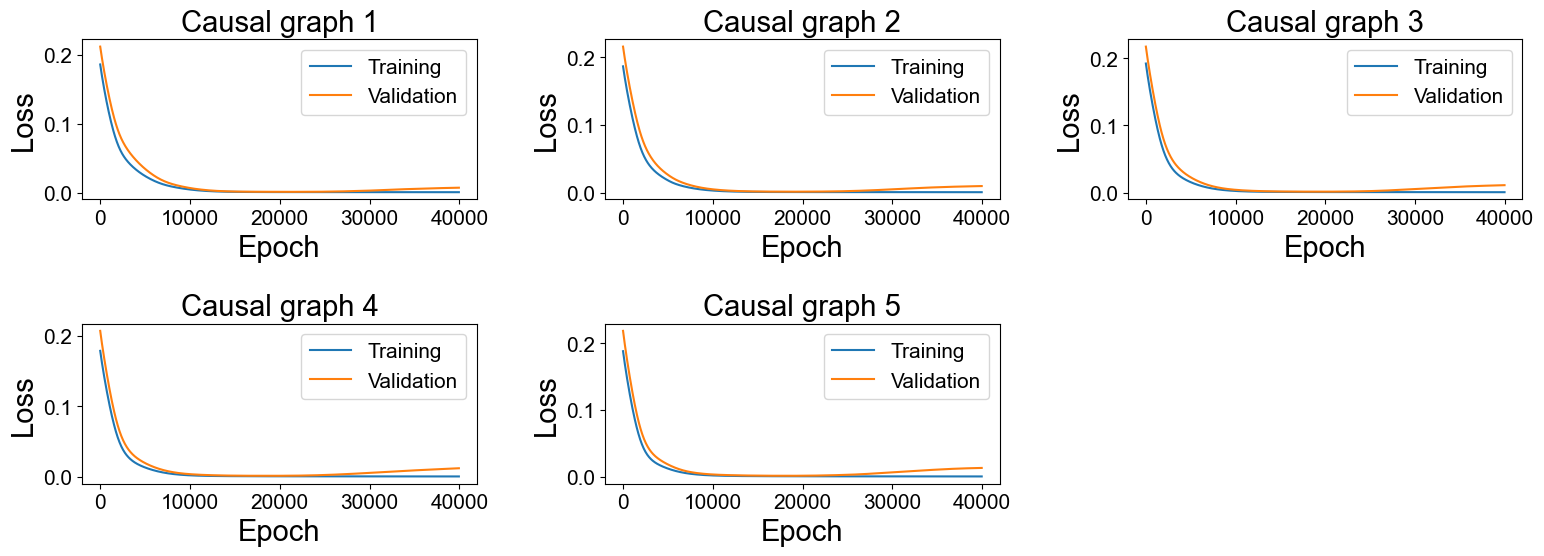

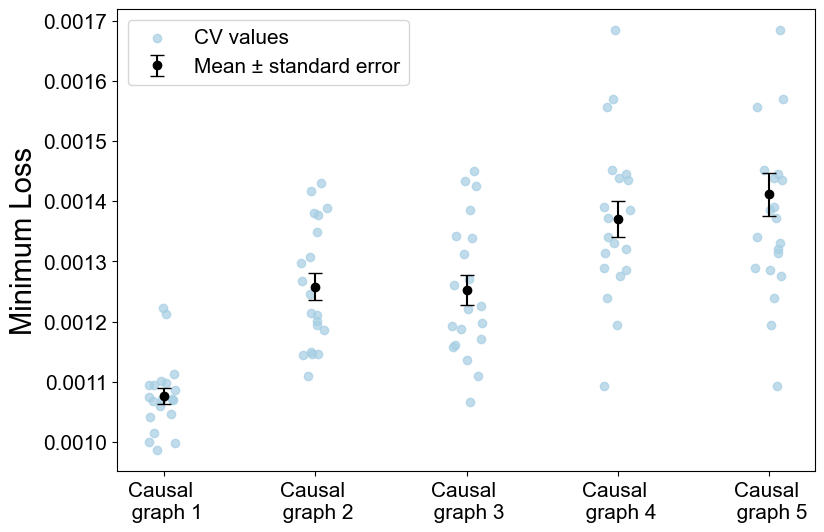

In [19]:
def extract_losses(folder_name):
    directory = os.fsencode(folder_name)

    reg_train_losses0 = 0    
    reg_train_losses1 = 0
    reg_train_losses2 = 0
    reg_train_losses3 = 0
    reg_train_losses4 = 0


    reg_val_losses0 = 0
    reg_val_losses1 = 0
    reg_val_losses2 = 0
    reg_val_losses3 = 0
    reg_val_losses4 = 0

    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        x = np.load(folder_name +"/" + filename)

        if filename.endswith("train_loss.npy"):
            if filename.startswith("graph_0"):
                reg_train_losses0 += x/19
            
            if filename.startswith("graph_1"):
                reg_train_losses1 += x/19

            if filename.startswith("graph_2"):
                reg_train_losses2 += x/19

            if filename.startswith("graph_3"):
                reg_train_losses3 += x/19

            if filename.startswith("graph_4"):
                reg_train_losses4 += x/19

        else:
            if filename.startswith("graph_0"):
                reg_val_losses0 += x/19
            
            if filename.startswith("graph_1"):
                reg_val_losses1 += x/19

            if filename.startswith("graph_2"):
                reg_val_losses2 += x/19

            if filename.startswith("graph_3"):
                reg_val_losses3 += x/19

            if filename.startswith("graph_4"):
                reg_val_losses4 += x/19

    reg_train_losses = [reg_train_losses0, reg_train_losses1, reg_train_losses2, reg_train_losses3, reg_train_losses4]
    reg_val_losses = [reg_val_losses0, reg_val_losses1, reg_val_losses2, reg_val_losses3, reg_val_losses4]
    
    return reg_train_losses, reg_val_losses

train_losses = []
val_losses = []
i=0
for folder in os.listdir("./data_preprocessing/causal_data/neural_cross_validation/"):
    print(i)
    train_loss, val_loss = extract_losses("./data_preprocessing/causal_data/neural_cross_validation/" + folder)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    i += 1

train_losses = np.array(train_losses)
val_losses = np.array(val_losses)

#train_loss[i,j,k]: i'th iteration, jth causal graph, k'th epoch
xs = np.arange(0,40000, 50)
mean_train_losses = np.mean(train_losses, axis=0)
mean_val_losses = np.mean(val_losses, axis=0)
err_train_losses = np.std(train_losses, axis=0)/np.sqrt(20)
err_val_losses = np.std(val_losses, axis=0)/np.sqrt(20)

s=0
fig, ax = plt.subplots(2,3, figsize = (16,6))
ind = [[0,0],[0,1],[0,2],[1,0],[1,1]]
for i in range(5):
    ax[ind[i][0], ind[i][1]].plot(xs[s:], mean_train_losses[i][s:], label = "Training")
    ax[ind[i][0], ind[i][1]].plot(xs[s:], mean_val_losses[i][s:], label = "Validation")
    ax[ind[i][0], ind[i][1]].legend()
    ax[ind[i][0], ind[i][1]].set_xlabel("Epoch")
    ax[ind[i][0], ind[i][1]].set_ylabel("Loss")
    ax[ind[i][0], ind[i][1]].set_title("Causal graph " + str(i+1))

ax[1,2].set_xticks([],[])
ax[1,2].set_yticks([],[])
ax[1,2].spines['top'].set_visible(False)
ax[1,2].spines['right'].set_visible(False)
ax[1,2].spines['bottom'].set_visible(False)
ax[1,2].spines['left'].set_visible(False)

plt.tight_layout()

#extracting minimum validation loss
minimum_val_losses = []
for i in range(len(mean_val_losses)):
    minimum_val_losses.append(val_losses[:,i,np.argmin(mean_val_losses[i])])

minimum_val_losses = np.array(minimum_val_losses)

plt.figure(figsize = (9,6))
for i in range(4):
    plt.scatter(i + np.random.uniform(-0.1,0.1, 20), minimum_val_losses[i],alpha=0.7,color = plt.cm.Paired(0))
plt.scatter(4 + np.random.uniform(-0.1,0.1, 20), minimum_val_losses[i],alpha=0.7,color = plt.cm.Paired(0), label = "CV values")

plt.errorbar(np.arange(5), np.mean(minimum_val_losses, axis=1), yerr = np.std(minimum_val_losses, axis=1)/np.sqrt(20), fmt="o", capsize=5, color = "black", label = "Mean ± standard error")

plt.legend()
plt.ylabel("Minimum Loss")
plt.xticks([0,1,2,3,4],["Causal \n graph 1","Causal \n graph 2","Causal \n graph 3","Causal \n graph 4","Causal \n graph 5"])

Run the below codeblock if you wish to retrain your own network. 

Parameters we chose (lam = regularisation parameter, lr = learning rate):

- Causal graph 4: lam = 1.6e-4, lr = 2.4e-1
- Causal graph 3: lam = 3e-3, lr = 2e-2
- Causal graph 2: lam = 6e-3, lr = 1e-2

We ran all models for 100000 epochs, which can take up to 30 minutes.

Note that results may vary slightly from training run to training run.

In [25]:
#Extracting data and min/max normalising
all_dnas = list((data.all_4d_dnas - np.min(data.all_4d_dnas))/(np.max(data.all_4d_dnas) - np.min(data.all_4d_dnas)))
all_mtvols = list((data.all_4d_mtvols - np.min(data.all_4d_mtvols))/(np.max(data.all_4d_mtvols) - np.min(data.all_4d_mtvols)))
all_cellvols = list((data.all_4d_cellvols - np.min(data.all_4d_cellvols))/(np.max(data.all_4d_cellvols) - np.min(data.all_4d_cellvols)))

X = torch.tensor(np.array([all_dnas, all_mtvols, all_cellvols]), dtype=torch.float32)
X = X.transpose(0,2)
X = X.transpose(0,1)

#Generating and training neural network

max_iter = 100000
lam = 3e-3
lr = 2e-2
hidden_size = 5
context = 6
clstm = cLSTM(X.shape[-1], hidden=hidden_size)
train_loss_list, params = train_model_ista(
        clstm, X, context=context, lam=lam, lam_ridge=0, lr=lr, max_iter=max_iter,
        check_every=50, verbose=1)

----------Iter = 50----------
Loss = 0.056534
Variable usage = 100.00%
----------Iter = 100----------
Loss = 0.051961
Variable usage = 100.00%
----------Iter = 150----------
Loss = 0.048699
Variable usage = 100.00%
----------Iter = 200----------
Loss = 0.045390
Variable usage = 100.00%
----------Iter = 250----------
Loss = 0.042036
Variable usage = 100.00%
----------Iter = 300----------
Loss = 0.038680
Variable usage = 100.00%
----------Iter = 350----------
Loss = 0.035395
Variable usage = 100.00%
----------Iter = 400----------
Loss = 0.032261
Variable usage = 100.00%
----------Iter = 450----------
Loss = 0.029354
Variable usage = 100.00%
----------Iter = 500----------
Loss = 0.026731
Variable usage = 100.00%
----------Iter = 550----------
Loss = 0.024428
Variable usage = 100.00%
----------Iter = 600----------
Loss = 0.022456
Variable usage = 100.00%
----------Iter = 650----------
Loss = 0.020806
Variable usage = 100.00%
----------Iter = 700----------
Loss = 0.019454
Variable usage = 1

Plotting the results of the above training

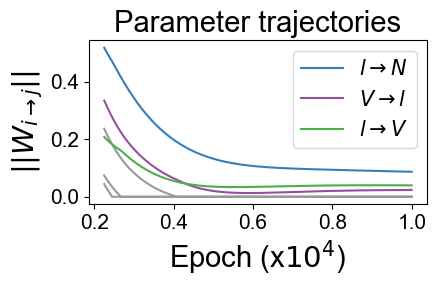

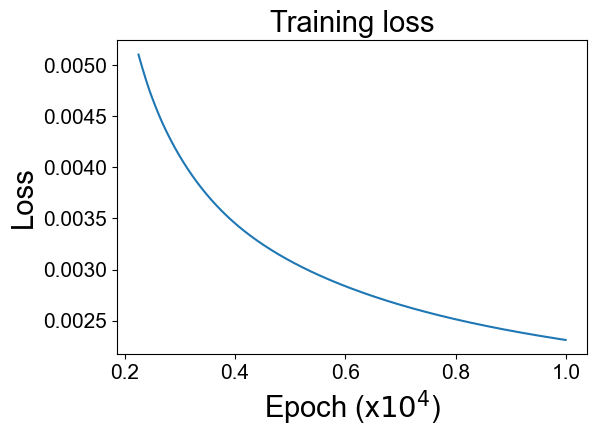

In [26]:
plt.figure(1, figsize = (1.6*3,1.1*3))
params_t = np.transpose(np.array(params), axes = (1,2,0))
causalities = np.array([[r"$N \rightarrow N$", r"$l \rightarrow N$", r"$V \rightarrow N$"],
               [r"$N \rightarrow l$", r"$l \rightarrow l$", r"$V \rightarrow l$"],
               [r"$N \rightarrow V$", r"$l \rightarrow V$", r"$V \rightarrow V$"]])

indexes = np.array([[0,1,4],
           [6,0,3],
           [5,2,0]])

s = 450
for i in range(3):
    for j in range(3):
        if i != j:
            if params_t[i][j][-1] != 0:
                plt.plot(np.arange((max_iter - s*50)//50)*50/max_iter +s*50/max_iter, params_t[i][j][s:], label = causalities[i,j], color=plt.cm.Set1(indexes[i,j]))
                #plt.plot(params_t[i][j][600:], label = causalities[i,j], color=plt.cm.Set1(indexes[i,j]))
            else:
                plt.plot(np.arange((max_iter - s*50)//50)*50/max_iter +s*50/max_iter, params_t[i][j][s:], color=plt.cm.Set1(8))
                # plt.plot(params_t[i][j][600:], color=plt.cm.Set1(8))

plt.legend()
plt.xlabel("Epoch (x$10^4$)")
plt.ylabel(r"$||W_{i \rightarrow j}||$")
plt.title("Parameter trajectories")
plt.tight_layout()

plt.figure(2)
plt.plot(np.arange((max_iter - s*50)//50)*50/max_iter +s*50/max_iter, train_loss_list[s:])
plt.xlabel("Epoch (x$10^4$)")
plt.ylabel("Loss")
plt.title("Training loss")
plt.tight_layout()

Here, we illustrate how we performed the cross validation. Running the below codeblock with num_iter=40000 recreates one iteration of the cross validation, for one of the networks. Repeating this 20 times, for all 5 networks, recreates our analysis. 

For the sake of time and demonstration, num_iter is set to 5000: adjust this however you see fit. Note this code block will take 20 minutes to run, and will take longer if num_iter is larger.

For more details see Supplementary Information Section 7.1.2

In [12]:
#Extracting data and min/max normalising
all_dnas = list((data.all_4d_dnas - np.min(data.all_4d_dnas))/(np.max(data.all_4d_dnas) - np.min(data.all_4d_dnas)))
all_mtvols = list((data.all_4d_mtvols - np.min(data.all_4d_mtvols))/(np.max(data.all_4d_mtvols) - np.min(data.all_4d_mtvols)))
all_cellvols = list((data.all_4d_cellvols - np.min(data.all_4d_cellvols))/(np.max(data.all_4d_cellvols) - np.min(data.all_4d_cellvols)))

X = torch.tensor(np.array([all_dnas, all_mtvols, all_cellvols]), dtype=torch.float32)
X = X.transpose(0,2)
X = X.transpose(0,1)

net = 2
lr = 5e-5
num_iter = 5000
train_lists = []
val_lists = []
for fold in range(19):
    print(fold)
    train_loss_list, val_loss_list = train_val_ith_fold_unregularised(all_dnas, all_mtvols, all_cellvols, net, fold, lr, num_iter)

train_lists.append(train_loss_list)
val_lists.append(val_loss_list)
train_lists = np.array(train_lists)
val_lists = np.array(val_lists)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


Plotting training and validation error from the above training

Text(0.5, 1.0, 'Cross validation loss for specified causal graph')

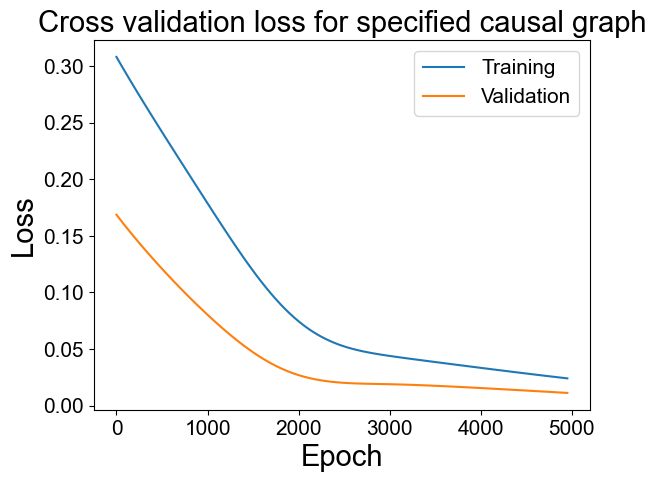

In [14]:
xs = np.arange(0,num_iter, 50)
mean_train_lists = np.mean(train_lists, axis=0)
mean_val_lists = np.mean(val_lists, axis=0)
s=0
plt.plot(xs[s:], mean_train_lists[s:], label = "Training")
plt.plot(xs[s:], mean_val_lists[s:], label = "Validation")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Cross validation loss for specified causal graph")